In [242]:
import geopandas as gpd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

## Latitude - north to south -> horizontal lines -> acts as y
## Longitude - east to west -> vertical lines -> acts as x

### Loadign the required data.

In [243]:
shapefile_path = r"/home/vedanshi/Documents/DSML/IMD work/Narmada/NARMADA.shp"
gdf = gpd.read_file(shapefile_path)

In [244]:
print(f"Current CRS: {gdf.crs}")

Current CRS: PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",24],PARAMETER["central_meridian",80],PARAMETER["standard_parallel_1",12.4729444],PARAMETER["standard_parallel_2",35.17280555],PARAMETER["false_easting",4000000],PARAMETER["false_northing",4000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [245]:
gdf = gdf.to_crs(epsg=4326)

In [246]:
nc_file = "/home/vedanshi/Documents/DSML/IMD work/Narmada/RF25_ind2005_rfp25.nc" # 2005s data is loaded.
dataset = Dataset(nc_file, 'r')

In [247]:
path2='/home/vedanshi/Documents/DSML/IMD work/Narmada/RF25_ind2015_rfp25.nc' # 2015s data 
dataset1 = Dataset(path2, 'r')
path3='/home/vedanshi/Documents/DSML/IMD work/Narmada/RF25_ind2021_rfp25.nc' # 2021s data
dataset2 = Dataset(path3, 'r')

In [248]:
print("All variable keys:")
print(dataset.variables.keys())#,'\n',dataset1.variables.keys(),'\n',dataset2.varaibles.keys())

All variable keys:
dict_keys(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'])


In [249]:
dataset1.variables.keys()

dict_keys(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'])

In [250]:
dataset2.variables.keys()

dict_keys(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'])

In [251]:
latitude = dataset.variables['LATITUDE'][:]
longitude = dataset.variables['LONGITUDE'][:]
precipitation = dataset.variables['RAINFALL'][:]
precipitation1 = dataset1.variables['RAINFALL'][:]
precipitation2 = dataset2.variables['RAINFALL'][:]
#latitude1 = dataset1.variables['LATITUDE'][:]
#longitude1 = dataset1.variables['LONGITUDE'][:]
#latitude2 = dataset2.variables['LATITUDE'][:]
#longitude2 = dataset2.variables['LONGITUDE'][:]

In [252]:
latitude.ndim

1

In [253]:
miny = 21.3
maxy = 23.8
minx = 72.6
maxx = 81.95

In [254]:
# Create a mask for the bounding box
lat_mask = (latitude >= miny) & (latitude <= maxy)
lon_mask = (longitude >= minx) & (longitude <= maxx )

In [255]:
# Crop the precipitation data to the bounding box
precipitation_cropped = precipitation[:, lat_mask, :][:, :, lon_mask]
precipitation_cropped1 = precipitation1[:, lat_mask, :][:, :, lon_mask]
precipitation_cropped2 = precipitation2[:, lat_mask, :][:, :, lon_mask]

In [256]:
print(precipitation_cropped.shape==precipitation_cropped1.shape==precipitation_cropped2.shape)

True


In [257]:
precipitation_day = precipitation_cropped[0]
precipitation_day1 = precipitation_cropped1[0]
precipitation_day2 = precipitation_cropped2[0]

In [258]:
precipitation_day_flatten = precipitation_cropped[0].flatten()
precipitation_day1_faltten = precipitation_cropped1[0].flatten()
precipitation_day2_flatten = precipitation_cropped2[0].flatten()

In [259]:
precip_day1_2005 = precipitation_day.filled(fill_value=0)
precip_day1_2015 = precipitation_day1.filled(fill_value=0)
precip_day1_2021 = precipitation_day2.filled(fill_value=0)

In [260]:
precipitation={'2005':precip_day1_2005,'2015':precip_day1_2015,'2021':precip_day1_2021}

In [261]:
precipitation['2015']

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.98093748e-01, 1.05621910e+01,
        1.01032047e+01, 9.94757366e+00, 1.03191710e+01, 1.48726063e+01,
        3.03020840e+01, 4.26476593e+01, 4.08819580e+01, 3.87063446e+01,
        3.98728676e+01, 5.08384857e+01, 7.86690521e+01, 9.36542206e+01,
        4.26098862e+01, 8.59540176e+00, 7.19787979e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.06938326e+00, 1.17564611e+01,
        1.08974581e+01, 6.90147924e+00, 1.62341156e+01, 2.58180428e+01,
        1.51986618e+01, 2.53204365e+01, 3.66083717e+01, 3.20365105e+01,
        3.02111130e+01, 5.85774765e+01,

In [262]:
precipitation['2021']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [263]:
precipitation['2005']

array([[0.        , 0.        , 0.10043453, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.     

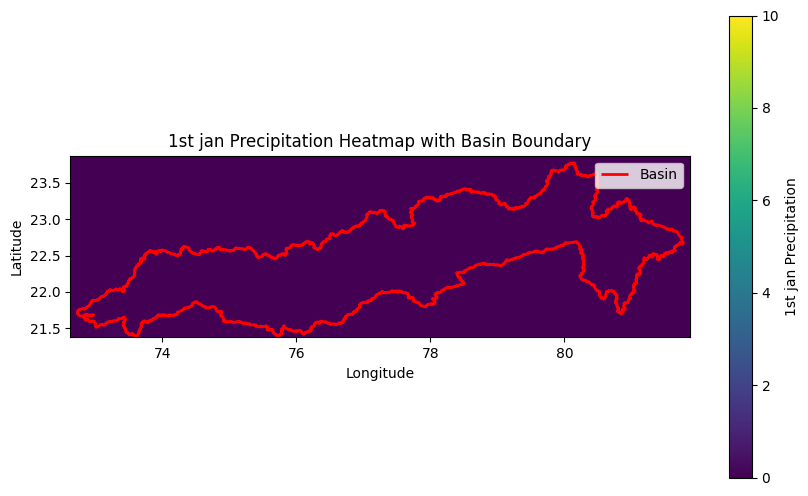

In [264]:
colorbar_min = 0  # replace with your desired minimum value
colorbar_max = 10  # replace with your desired maximum value

fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the Axes object `ax`
# Add vmin and vmax to set the range of the colorbar

c = ax.pcolormesh(longitude[lon_mask], latitude[lat_mask], precip_day1_2005, 
                shading='auto', vmin=colorbar_min, vmax=colorbar_max)
# Add the colorbar
fig.colorbar(c, ax=ax, label='1st jan Precipitation')
# Oerlay the basin boundary, make sure to specify the same Axes object `ax`
gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Basin')
# Ad the legend
ax.legend()
# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('1st jan Precipitation Heatmap with Basin Boundary')
# Dsplay the plot
plt.show()

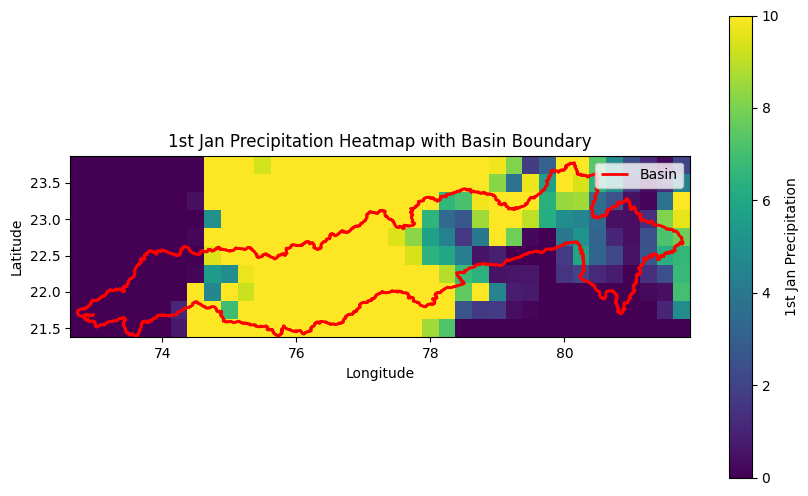

In [265]:
colorbar_min = 0  # replace with your desired minimum value
colorbar_max = 10  # replace with your desired maximum value

fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the Axes object `ax`
# Add vmin and vmax to set the range of the colorbar

c = ax.pcolormesh(longitude[lon_mask], latitude[lat_mask], precip_day1_2015, 
                shading='auto', vmin=colorbar_min, vmax=colorbar_max)
# Add the colorbar
fig.colorbar(c, ax=ax, label='1st Jan Precipitation')
# Oerlay the basin boundary, make sure to specify the same Axes object `ax`
gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Basin')
# Ad the legend
ax.legend()
# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('1st Jan Precipitation Heatmap with Basin Boundary')
# Dsplay the plot
plt.show()

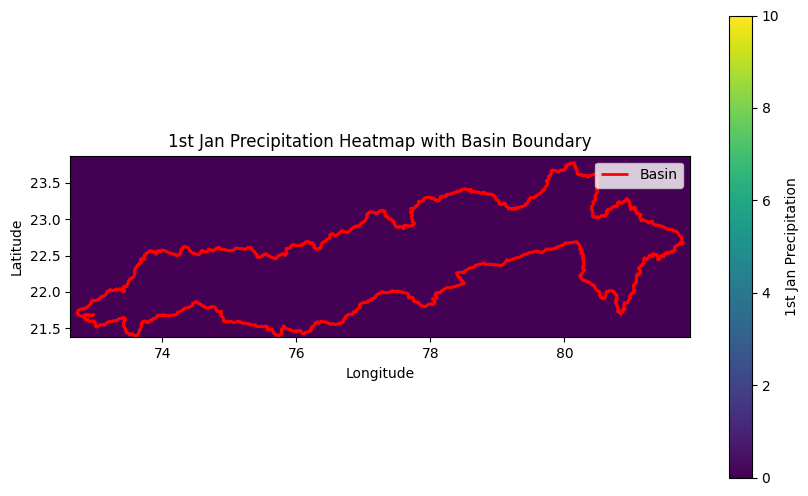

In [266]:
colorbar_min = 0  # replace with your desired minimum value
colorbar_max = 10  # replace with your desired maximum value

fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the Axes object `ax`
# Add vmin and vmax to set the range of the colorbar

c = ax.pcolormesh(longitude[lon_mask], latitude[lat_mask], precip_day1_2021, 
                shading='auto', vmin=colorbar_min, vmax=colorbar_max)
# Add the colorbar
fig.colorbar(c, ax=ax, label='1st Jan Precipitation')
# Oerlay the basin boundary, make sure to specify the same Axes object `ax`
gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Basin')
# Ad the legend
ax.legend()
# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('1st Jan Precipitation Heatmap with Basin Boundary')
# Dsplay the plot
plt.show()

We have to find the weghted area average of the closest 3-4 points, and then assing that value to the cetroid, and add the values to get the area to the main centroid of the small region.

for that we'll first have to create the custom grid that is not present in this code.

### Creating custom grid.

In [267]:
# gdf is the shape file for narmada.
# dataset is the rain data.
import geopandas as gpd 
import matplotlib as ma
import pandas as pd
import threading as thread
import fiona
import matplotlib as plt
import plotly.express as plt
import numpy as np

In [268]:
bound_box=gdf.total_bounds
minx_grid,miny_grid,maxx_grid,maxy_grid=bound_box
bound_box

array([72.73538871, 21.38320554, 81.77175067, 23.78039251])

In [269]:
from shapely.geometry import box
# Create a rectangle from these coordinates using shapely's box function
rectangle = gpd.GeoSeries([box(minx_grid, miny_grid, maxx_grid, maxy_grid)], crs=gdf.crs)
# Print the rectangle coordinates
print(f"Bounding Box Coordinates: {bound_box}")
print(f"Rectangle Geometry: {rectangle}")

Bounding Box Coordinates: [72.73538871 21.38320554 81.77175067 23.78039251]
Rectangle Geometry: 0    POLYGON ((81.77175 21.38321, 81.77175 23.78039...
dtype: geometry


<Axes: >

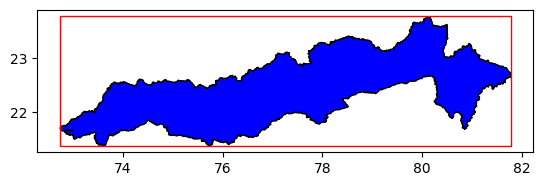

In [270]:
ax=gdf.plot(color='blue',edgecolor='k')
rectangle.plot(ax=ax, color='none', edgecolor='red') # I don't understand why is this sometiems shows an error.

In [271]:
#Increase the rectangle size by 15 km in both height and width
minx_new = minx_grid - 0.125
miny_new = miny_grid - 0.125
maxx_new = maxx_grid + 0.125
maxy_new = maxy_grid + 0.125

In [272]:
new_bounding_box = [minx_new, miny_new, maxx_new, maxy_new]
rectangle_new = gpd.GeoSeries([box(minx_new, miny_new, maxx_new, maxy_new)], crs=gdf.crs)
# Print the new bounding box coordinates as integers
print(f"New Bounding Box Coordinates: {list(map(float, new_bounding_box))}")

# Calculate and print the dimensions of the new rectangle as integers
width_new = maxx_new - minx_new
height_new = maxy_new - miny_new
print(f"New Rectangle Dimensions: Width = {float(width_new)}, Height = {float(height_new)}")

New Bounding Box Coordinates: [72.61038870964097, 21.258205539696, 81.89675066713441, 23.905392513851126]
New Rectangle Dimensions: Width = 9.28636195749344, Height = 2.647186974155126


<Axes: >

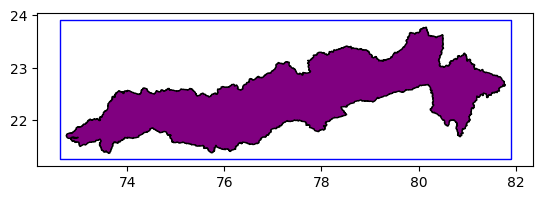

In [273]:
ax = gdf.plot(color='purple', edgecolor='k')
rectangle_new.plot(ax=ax, color='none', edgecolor='blue')

In [274]:
# using minx and maxx, i.e the boundary poits for the grid.
# initialize an empty list to store x-values for the custom grid
x_values = []
# generate x-values
current_x = minx
increment = 0.25 #this is an inceremnet of 0.25
while current_x <= maxx:
    x_values.append(current_x)  
    current_x += increment
len(x_values)

38

In [275]:
# using miny and maxy, i.e the boundary poits for the grid.
# initialize an empty list to store y-values for the custom grid
y_values = []
# generate y-values
current_y = miny
increment = 0.25 #this is an inceremnt of 0.25
while current_y <= maxy:
    y_values.append(current_y)  
    current_y += increment
len(y_values)

11

In [276]:
x_values = np.array(x_values, dtype=float) # x_values are the longitudes and y_values are the latitudes.
y_values = np.array(y_values, dtype=float)

In [277]:
# function to calculate grid parameters
def calculate_grid_parameters(coord):
    d = np.diff(coord)[0] / 2
    cell_boundaries = np.concatenate([[coord[0] - d], coord + d])
    return cell_boundaries

In [278]:
# function to create grid cell taking arguments from x_values and y_values
def initialize_and_populate_grid(x_values, y_values):
    ngrid_cell = len(x_values) * len(y_values)
    grid_cell = [{} for _ in range(ngrid_cell)]
    
    dy = y_values[1] - y_values[0]
    k = 0
    
    loncell = calculate_grid_parameters(x_values)
    latcell = calculate_grid_parameters(y_values)
    
    for i, lon in enumerate(x_values):
        for j, lat in enumerate(y_values):
            x_coords = [round(loncell[i], 2), round(loncell[i], 2), round(loncell[i+1], 2), round(loncell[i+1], 2), round(loncell[i], 2)]
            y_coords = [round(latcell[j], 2), round(latcell[j+1], 2), round(latcell[j+1], 2), round(latcell[j], 2), round(latcell[j], 2)] if dy > 0 else \
                       [round(latcell[j+1], 2), round(latcell[j], 2), round(latcell[j], 2), round(latcell[j+1], 2), round(latcell[j+1], 2)]
            
            grid_cell[k] = {'X': x_coords, 'Y': y_coords, 'Xc': round(lon, 2), 'Yc': round(lat, 2)}
            k += 1
    return grid_cell

In [279]:
if __name__ == "__main__":
    grid_cell = initialize_and_populate_grid(x_values, y_values)

In [280]:
grid_cell

[{'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.18, 21.42, 21.42, 21.18, 21.18],
  'Xc': 72.6,
  'Yc': 21.3},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.42, 21.68, 21.68, 21.42, 21.42],
  'Xc': 72.6,
  'Yc': 21.55},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.68, 21.92, 21.92, 21.68, 21.68],
  'Xc': 72.6,
  'Yc': 21.8},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.92, 22.18, 22.18, 21.92, 21.92],
  'Xc': 72.6,
  'Yc': 22.05},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.18, 22.42, 22.42, 22.18, 22.18],
  'Xc': 72.6,
  'Yc': 22.3},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.42, 22.68, 22.68, 22.42, 22.42],
  'Xc': 72.6,
  'Yc': 22.55},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.68, 22.92, 22.92, 22.68, 22.68],
  'Xc': 72.6,
  'Yc': 22.8},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.92, 23.18, 23.18, 22.92, 22.92],
  'Xc': 72.6,
  'Yc': 23.05},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [23.18, 2

In [281]:
len(grid_cell)==38*11

True

In [282]:
# creating a geodataframe for grid cells as polygons
from shapely.geometry import Polygon
import geopandas as gpd

grid_cells = []

for cell in grid_cell:
    polygon = Polygon(list(zip(cell['X'], cell['Y'])))
    grid_cells.append(polygon)

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)

print(grid_gdf.head())

                                            geometry
0  POLYGON ((72.47000 21.18000, 72.47000 21.42000...
1  POLYGON ((72.47000 21.42000, 72.47000 21.68000...
2  POLYGON ((72.47000 21.68000, 72.47000 21.92000...
3  POLYGON ((72.47000 21.92000, 72.47000 22.18000...
4  POLYGON ((72.47000 22.18000, 72.47000 22.42000...


In [283]:
grid_gdf.iloc[35]

geometry    POLYGON ((73.22000 21.68000, 73.22000 21.92000...
Name: 35, dtype: geometry

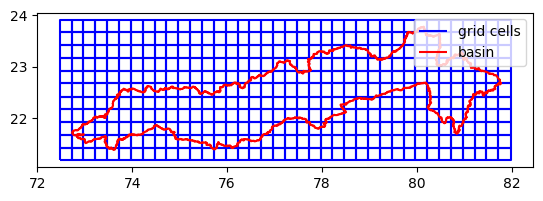

In [284]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
grid_gdf.boundary.plot(ax=ax, color='blue',label='grid cells')
gdf.boundary.plot(ax=ax, color='red',label='basin')
plt.legend()
plt.show()

## We now have to find the total precipitation of the grid, and then find the area average and assign it to Narmada on its centroid

### The process of finding weighted average begins

In [285]:
A=0.25**2 #area of one grid cell.

In [286]:
intersecting_cells = gpd.sjoin(grid_gdf, gdf, how="inner", predicate="intersects")
num_intersecting_cells = len(intersecting_cells)
print(f"Number of intersecting cells: {num_intersecting_cells}")


Number of intersecting cells: 196


In [287]:
# Calculate the intersection area
intersecting_cells['intersection_area'] = intersecting_cells.apply(lambda row: row['geometry'].intersection(gdf.loc[row['index_right'], 'geometry']).area, axis=1)

In [288]:
gdf

,AREA,PERIMETER,AREA_SQKM,BA_ID,BA_NAME,Latitude,Longitude,Place,geometry
0,9.496441e+10,3.750829e+06,92618.492051,12,Narmada,None,None,None,"POLYGON ((73.42627 21.51741, 73.42601 21.52111..."


In [289]:
grid_gdf

,geometry
0,"POLYGON ((72.47000 21.18000, 72.47000 21.42000..."
1,"POLYGON ((72.47000 21.42000, 72.47000 21.68000..."
2,"POLYGON ((72.47000 21.68000, 72.47000 21.92000..."
3,"POLYGON ((72.47000 21.92000, 72.47000 22.18000..."
4,"POLYGON ((72.47000 22.18000, 72.47000 22.42000..."
...,...
413,"POLYGON ((81.72000 22.68000, 81.72000 22.92000..."
414,"POLYGON ((81.72000 22.92000, 81.72000 23.18000..."
415,"POLYGON ((81.72000 23.18000, 81.72000 23.42000..."
416,"POLYGON ((81.72000 23.42000, 81.72000 23.68000..."


In [290]:
completely_inside = grid_gdf['geometry'].within(gdf.iloc[0]['geometry'])
completely_inside_indices = [index for index, inside in enumerate(grid_gdf['geometry'].within(gdf.iloc[0]['geometry'])) if inside]
completely_inside_indices
#len(completely_inside_indices)

[35,
 46,
 58,
 59,
 69,
 70,
 80,
 81,
 91,
 92,
 102,
 103,
 112,
 113,
 114,
 123,
 124,
 125,
 134,
 135,
 136,
 145,
 146,
 147,
 156,
 157,
 158,
 167,
 168,
 169,
 178,
 179,
 180,
 181,
 190,
 191,
 192,
 202,
 203,
 204,
 213,
 214,
 215,
 224,
 225,
 235,
 236,
 246,
 247,
 248,
 249,
 258,
 259,
 260,
 269,
 270,
 271,
 280,
 281,
 282,
 292,
 303,
 314,
 315,
 325,
 326,
 327,
 337,
 338,
 347,
 356,
 357,
 358,
 367,
 368,
 369,
 380]

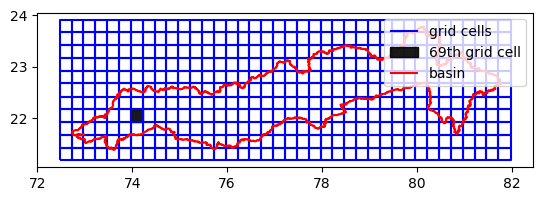

In [291]:
#plotting one of the cell, that we found out to be inside the basin, and completely inside
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
grid_polygon = grid_gdf.iloc[69]['geometry']
ax.fill(*grid_polygon.exterior.xy, color='black', alpha=0.9, label='69th grid cell')
gdf.boundary.plot(ax=ax, color='red', label='basin')
plt.legend()
plt.show()

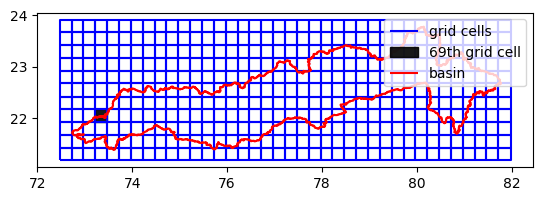

In [331]:
#plotting one of the cell, that we found out to be inside the basin, and completely inside
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
grid_polygon = grid_gdf.iloc[36]['geometry']
ax.fill(*grid_polygon.exterior.xy, color='black', alpha=0.9, label='69th grid cell')
gdf.boundary.plot(ax=ax, color='red', label='basin')
plt.legend()
plt.show()

In [292]:
grid_cell # we can directly use grid_cell, as its easier to extract

[{'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.18, 21.42, 21.42, 21.18, 21.18],
  'Xc': 72.6,
  'Yc': 21.3},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.42, 21.68, 21.68, 21.42, 21.42],
  'Xc': 72.6,
  'Yc': 21.55},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.68, 21.92, 21.92, 21.68, 21.68],
  'Xc': 72.6,
  'Yc': 21.8},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [21.92, 22.18, 22.18, 21.92, 21.92],
  'Xc': 72.6,
  'Yc': 22.05},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.18, 22.42, 22.42, 22.18, 22.18],
  'Xc': 72.6,
  'Yc': 22.3},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.42, 22.68, 22.68, 22.42, 22.42],
  'Xc': 72.6,
  'Yc': 22.55},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.68, 22.92, 22.92, 22.68, 22.68],
  'Xc': 72.6,
  'Yc': 22.8},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [22.92, 23.18, 23.18, 22.92, 22.92],
  'Xc': 72.6,
  'Yc': 23.05},
 {'X': [72.47, 72.47, 72.72, 72.72, 72.47],
  'Y': [23.18, 2

In [293]:
intersecting_cells.columns

Index(['geometry', 'index_right', 'AREA', 'PERIMETER', 'AREA_SQKM', 'BA_ID',
       'BA_NAME', 'Latitude', 'Longitude', 'Place', 'intersection_area'],
      dtype='object')

In [294]:
intersecting_cells['intersection_type'] = 0  # Initialize all values to 0

for index in completely_inside_indices:
    intersecting_cells.loc[index, 'intersection_type'] = 1

intersecting_cells['intersection_type']


12     0
13     0
23     0
24     0
25     0
      ..
392    0
401    0
402    0
412    0
413    0
Name: intersection_type, Length: 196, dtype: int64

In [295]:
l=intersecting_cells.index
print(l)

Index([ 12,  13,  23,  24,  25,  34,  35,  36,  44,  45,
       ...
       380, 381, 382, 390, 391, 392, 401, 402, 412, 413],
      dtype='int64', length=196)


In [296]:
intersecting_cells['intersection_area']=pd.NA
for i in l:
    if intersecting_cells['intersection_type'][i]==1:
        intersecting_cells['intersection_area']=A
    else:
        intersecting_cells.loc[i, 'intersection_area'] = intersecting_cells.loc[i, 'geometry'].intersection(gdf.loc[intersecting_cells.loc[i, 'index_right'], 'geometry']).area

In [297]:
grid_cell[12]

{'X': [72.72, 72.72, 72.97, 72.97, 72.72],
 'Y': [21.42, 21.68, 21.68, 21.42, 21.42],
 'Xc': 72.85,
 'Yc': 21.55}

In [298]:
rain=[]
for i in l:
    rain.append([grid_cell[i]['Xc'],grid_cell[i]['Yc']])
rain_coords=pd.DataFrame(rain) #Centroids.

In [299]:
rain_coords

,0,1
0,72.85,21.55
1,72.85,21.80
2,73.10,21.55
3,73.10,21.80
4,73.10,22.05
...,...,...
191,81.35,23.05
192,81.60,22.55
193,81.60,22.80
194,81.85,22.55


In [300]:
# Extracting the lat and lon of the basin for which we will interpolate, the rain at the centorids.
lat_req=[]
for i in dataset['LATITUDE']:
    if miny_grid<i<maxy_grid:
        lat_req.append(i)
lon_req=[]
for j in dataset['LONGITUDE']:
    if minx_grid<j<maxx_grid:
        lon_req.append(j)

In [301]:
lon,lat=np.meshgrid(lon_req,lat_req)

In [302]:
prcp_points= np.column_stack((lon.ravel(), lat.ravel()))

In [303]:
def interpolate(coords,year,method_used):
    #entered coords must be upto accurcay of only 1 digit after the decimal.
    import scipy.interpolate as sci
    if year==2005:
        prcp_values_flat=precipitation['2005'].flatten()
    elif year==2015:
         prcp_values_flat=precipitation['2015'].flatten()
    elif year==2021:
         prcp_values_flat=precipitation['2021'].flatten()
    if method_used=='linear' or method_used=='bilinear':
        if method_used=='bilinear':
            return sci.griddata(prcp_points,prcp_values_flat,coords,method='nearest')
        else:
            return sci.griddata(prcp_points,prcp_values_flat,coords,method='linear')
    else :
            inter=sci.NearestNDInterpolator(prcp_points,prcp_values_flat,rescale=False,tree_options=None)
            return inter(coords)

In [304]:
def accuracy(y_true,y_interpolated):
    # Calculate MAE
    mae = np.mean(np.abs(y_interpolated - y_true))
    # Calculate MSE
    mse = np.mean((y_interpolated - y_true)**2)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Calculate R^2 score
    mean_true = np.mean(y_true)
    r2 = 1 - np.sum((y_true - y_interpolated)**2) / np.sum((y_true - mean_true)**2)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)


In [305]:
print(prcp_points.shape,precipitation['2005'].flatten().shape)

(370, 2) (370,)


In [306]:
interpolate(rain_coords,2015,'linear')

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                  nan, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.33495402e-01,
       4.27753305e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.26748731e+00, 2.30428463e+00, 5.94390154e-02, 3.80287975e-02,
       1.01475047e+01, 6.40712258e+00, 3.06666793e+00, 3.82107972e+00,
       9.43173342e+00, 8.03371134e+00, 1.14484693e+01, 6.70129366e+00,
       1.14489290e+01, 9.48699369e+00, 9.23117208e+00, 1.65844263e+01,
       7.26675949e+00, 1.29915100e+01, 1.43296324e+01, 1.81367378e+01,
       1.20918888e+01, 1.07295422e+01, 1.59329678e+01,            nan,
       2.32334846e+01, 1.96393417e+01, 1.65912571e+01, 1.59107605e+01,
       2.30102314e+01,            nan, 3.17748695e+01, 1.89786716e+01,
      

In [307]:
interpolate(rain_coords,2015,'bilinear')

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.06938326,   0.        ,   0.        ,   0.        ,
        11.75646114,  11.37282562,   0.14859754,   0.        ,
        10.10320473,  10.89745808,   4.57068205,   5.42991972,
         9.4576273 ,   9.94757366,   6.90147924,  21.33553123,
         4.91457939,  12.30212975,  10.31917095,  16.2341156 ,
         9.21730709,   9.69823074,  11.89182854,  14.87260628,
        14.87260628,  25.81804276,  16.16329956,  11.17971039,
        20.03338814,  30.30208397,  30.30208397,  15.1986618 ,
        13.85516167,  20.61122513,  25.4034462 ,  42.6476593 ,
        42.6476593 ,  25.32043648,  22.97389603,  22.22

In [308]:
interpolate(rain_coords,2015,'knn')

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.06938326,   0.        ,   0.        ,   0.        ,
        11.75646114,  11.37282562,   0.14859754,   0.        ,
        10.10320473,  10.89745808,   4.57068205,   5.42991972,
         9.4576273 ,   9.94757366,   6.90147924,  21.33553123,
         4.91457939,  12.30212975,  10.31917095,  16.2341156 ,
         9.21730709,   9.69823074,  11.89182854,  14.87260628,
        14.87260628,  25.81804276,  16.16329956,  11.17971039,
        20.03338814,  30.30208397,  30.30208397,  15.1986618 ,
        13.85516167,  20.61122513,  25.4034462 ,  42.6476593 ,
        42.6476593 ,  25.32043648,  22.97389603,  22.22

In [309]:
intersecting_cells['prcp_2005']=interpolate(rain_coords,2005,'bilinear')
intersecting_cells['prcp_2015']=interpolate(rain_coords,2015,'bilinear')
intersecting_cells['prcp_2021']=interpolate(rain_coords,2021,'bilinear')

In [310]:
intersecting_cells['intersection_area'].tail(30)

350    0.062500
354    0.062500
355    0.062500
356    0.062500
357    0.062500
358    0.062500
359    0.062500
360    0.062500
361    0.062500
365    0.062500
366    0.062500
367    0.062500
368    0.062500
369    0.062500
370    0.062500
371    0.062500
376    0.062500
377    0.062500
378    0.062500
379    0.062500
380    0.062500
381    0.039525
382    0.000465
390    0.048130
391    0.059222
392    0.004872
401    0.028076
402    0.042807
412    0.000544
413    0.002794
Name: intersection_area, dtype: float64

In [311]:
# Performing the actual process.
def calculate_rain(df,year):
    prcp=[]
    for i,j in zip(df['intersection_area'], df[f'prcp_{year}']):
        const=j/A
        prcp.append(const*i)
    return prcp

we now have to map these values to the respective centroid coords.

In [312]:
# These are centroids, to which we are mapping the rain on the centroid coords.
rain_coords['rain_2005']=calculate_rain(intersecting_cells,2005)
rain_coords['rain_2015']=calculate_rain(intersecting_cells,2015)
rain_coords['rain_2021']=calculate_rain(intersecting_cells,2021)
rain_coords.rename(columns={0:'longitude centroids'}, inplace=True)
rain_coords.rename(columns={1:'latitude centroids'}, inplace=True)
rain_coords

,longitude centroids,latitude centroids,rain_2005,rain_2015,rain_2021
0,72.85,21.55,0.0,0.000000,0.0
1,72.85,21.80,0.0,0.000000,0.0
2,73.10,21.55,0.0,0.000000,0.0
3,73.10,21.80,0.0,0.000000,0.0
4,73.10,22.05,0.0,0.000000,0.0
...,...,...,...,...,...
191,81.35,23.05,0.0,0.104882,0.0
192,81.60,22.55,0.0,2.820130,0.0
193,81.60,22.80,0.0,4.911252,0.0
194,81.85,22.55,0.0,0.057573,0.0


In [313]:
count = sum(1 for area in intersecting_cells['intersection_area'] if area == A) 
count

187

We will hvae to insert the prcp data in the grid_cell

In [314]:
main_centorid_lon=0.0
main_centorid_lat=0.0
sum_lon=0.0 # x coordinate
sum_lat=0.0 # y coordinate
for i in grid_cell:
    sum_lon+=i['Xc']
    sum_lat+=i['Yc']
main_centorid_lon=sum_lon/len(grid_cell)
main_centorid_lat=sum_lat/len(grid_cell)

In [315]:
# We now have to just get the weighted average on this coordinate
print(main_centorid_lon)
print(main_centorid_lat)

77.22499999999944
22.550000000000015


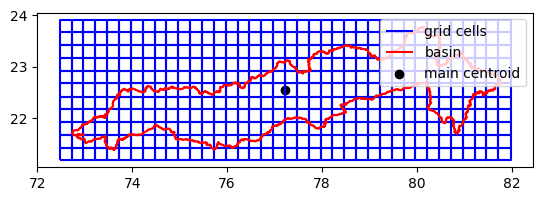

In [316]:
import matplotlib.pyplot as plt
# Assuming you already have grid_gdf and gdf defined somewhere in your code
fig, ax = plt.subplots()
# Plot grid cells boundary
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
# Plot basin boundary
gdf.boundary.plot(ax=ax, color='red', label='basin')
# Plot main centroid
ax.scatter(main_centorid_lon, main_centorid_lat, color='black', label='main centroid')
plt.legend()
plt.show()

### Finding the weighted average for 2005, 2015 & 2021

In [317]:
#temp=[]
#for i in range(196):
#    temp.append([rain_coords['longitude centroids'][i],rain_coords['latitude centroids'][i]])
#print(temp)
#print(rain_coords['rain_2005'].shape)

In [318]:
main_cent_value={'2005':rain_coords['rain_2005'].sum(),'2015':rain_coords['rain_2015'].sum(),'2021':rain_coords['rain_2021'].sum()}

In [319]:
#import scipy.interpolate as sci
#cords=(main_centorid_lon,main_centorid_lat)
#weighted_avg={'2005':sci.griddata(temp,rain_coords['rain_2005'],cords,method='linear'),'2015':sci.griddata(temp,rain_coords['rain_2015'],cords,method='linear'),'2021':sci.griddata(temp,rain_coords['rain_2021'],cords,method='linear')}

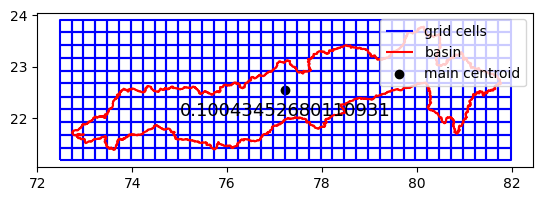

In [320]:
# for 2005
fig, ax = plt.subplots()
# Plot grid cells boundary
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
# Plot basin boundary
gdf.boundary.plot(ax=ax, color='red', label='basin')
# Plot main centroid
ax.scatter(main_centorid_lon, main_centorid_lat, color='black', label='main centroid')
# Add label or annotation for the main centroid point
main_centroid_value=main_cent_value['2005']
text_offset = 0.5
ax.text(main_centorid_lon, main_centorid_lat-text_offset, f'{main_centroid_value}', color='black', fontsize=13, ha='center')

plt.legend()
plt.show()


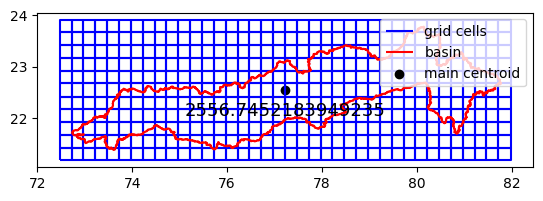

In [321]:
# for 2015
fig, ax = plt.subplots()
# Plot grid cells boundary
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
# Plot basin boundary
gdf.boundary.plot(ax=ax, color='red', label='basin')
# Plot main centroid
ax.scatter(main_centorid_lon, main_centorid_lat, color='black', label='main centroid')
# Add label or annotation for the main centroid point
main_centroid_value=main_cent_value['2015']
text_offset = 0.5
ax.text(main_centorid_lon, main_centorid_lat-text_offset, f'{main_centroid_value}', color='black', fontsize=13, ha='center')
plt.legend()
plt.show()

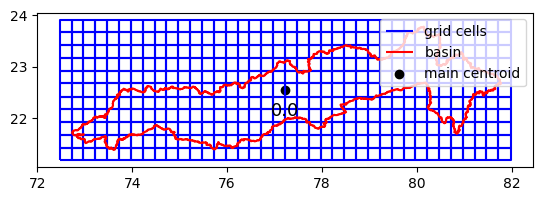

In [322]:
# for 2021
fig, ax = plt.subplots()
# Plot grid cells boundary
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
# Plot basin boundary
gdf.boundary.plot(ax=ax, color='red', label='basin')
# Plot main centroid
ax.scatter(main_centorid_lon, main_centorid_lat, color='black', label='main centroid')
# Add label or annotation for the main centroid point
main_centroid_value=main_cent_value['2021']
text_offset = 0.5
ax.text(main_centorid_lon, main_centorid_lat-text_offset, f'{main_centroid_value}', color='black', fontsize=13, ha='center')

plt.legend()
plt.show()
